# Stats 131 Final Project

## Kyra Edwards, Nephele Agrafiotis, Jason Beznos

# Background

Uber is an increasingly popular ride-share app used in many large US cities, including New York City. Riders request a pick-up in the form of pool (where other rides can be picked up and dropped off on the way), X (a private 4-person car), or XL (a private 6 or 7-person car). Common reasons people use Uber are lack of public transportation (common in LA), lack of private transportation (common in NYC), avoiding drunk driving, lack of parking at destination, cost efficiency, and going to the airport, among many other reasons.

### Uber Dataset

This specific data set from Yannis Pappas found on Kaggle is called "NYC Uber Pickups with Weather and Holidays". Yannis Pappas took a subset of the data from FiveThirtyEight's "Uber Pickups in New York City" that originally had from 20 million ride-shares. He combined it with weather data from the National Centers for Environmental Information and NYC Public Holidays.

The purpose of the data set was to show trends in uber pickups with different weather and holiday variables.

The data covers each day of January through June in 2015 and groups pickups by the hour and borough they are called in. For example, the first line is January 1st, 2015 from midnight to 1 am in the Bronx. The rest of the variables in the first row are based on this date, time, and place.

### Variables

    *pickup_dt*: Pick-up date & time
    Pandas datetime object
    The date and hour that the group of pick-ups occured, pre-grouped by hour
    Units: time (MM/DD/YYYY HH:MM)

    *borough*: NYC Borough
    Categorical
    New York City is split into 5 boroughs, but this variables also includes Newark Airport
    Categories: Bronx, Brooklyn, Manhattan, Queens, Staten Island, EWR

    *pickups*: Number of Pick-ups
    Integer (int64)
    The number of Uber pick-ups in the specified borough and the pickup_dt, pre-grouped by hour
    Units: none

    *windspeed*: Windspeed
    Numeric (float64)
    The average windspeed in the specified borough at that hour
    Units: miles/hour

    *visibility*: Visibility
    Numeric (float64)
    Visibility in miles rounded to the nearest tenth - "the distance one can see as determined by light and weather conditions"
    Units: miles

    *temp*: Temperature
    Numeric (float64)
    The temperature outside
    Units: degrees Fahrenheit

    *dewpoint*: Dew Point
    Numeric (float64)
    Dew point temperature - "the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form"
    Units: degrees Fahrenheit

    *slpressure*: Sea Level Pressure
    Numeric (float64)
    The average atmospheric pressure at sea level
    Units: mbar

    *pcp01*: 1-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 1 hour
    Units: inches

    *pcp06*: 6-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 6 hours
    Units: inches
    
    *pcp24*: 24-hour liquid precipitation
    Numeric (float64)
    Amount of rainfall in the past 24 hours
    Units: inches
    
    *snow*: Snow
    Numeric (float64)
    Amount of snow fall depth in inches
    Units: inches
    
    *holiday*: Holiday
    Categorical
    Whether the specified day in pickup_dt is a holiday or not, uses yes/no response
    Categories: Y, N

### Pre-Analysis Thoughts

Based on our personal experiences with Uber, an app our group and many other college students frequently use, we believe that worse weather will correlate with an increase in pickups. We also believe that there will be less pickups on holidays than non-holidays.

The reasoning behind these beliefs is that in a city, walking is fairly common due to the density and proximity of stores, work, and other necessities. When it is raining, snowing, or otherwise bad weater, it makes sense to Uber instead of walking in bad weather. Temperature will most likely not show a difference in pick-ups, but we believe that windspeed, precipitation, and snow will.

We believe there will be less pickups on holidays because people usually stay home on the holidays. Masses of people travel on the days right before and right after holidays but generally not on actual holidays. This is why we believe there will be less pickups on those days.

# Exploratory Analysis of the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv('uber_nyc_enriched.csv')

In [3]:
uber.head(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


### Data Clean-Up

In [4]:
# Changing the first column to a pandas datetime object
uber.pickup_dt = pd.to_datetime(uber['pickup_dt'],format='%Y-%m-%d %H:%M')
# uber.pickup_dt = pd.to_datetime(uber['pickup_dt'],format='%m/%d/%Y %H:%M')

In [5]:
uber.head(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
pickup_dt    29101 non-null datetime64[ns]
borough      26058 non-null object
pickups      29101 non-null int64
spd          29101 non-null float64
vsb          29101 non-null float64
temp         29101 non-null float64
dewp         29101 non-null float64
slp          29101 non-null float64
pcp01        29101 non-null float64
pcp06        29101 non-null float64
pcp24        29101 non-null float64
sd           29101 non-null float64
hday         29101 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [7]:
uber = uber.fillna("N/A")

In [8]:
uber = uber[(uber['borough'] != "N/A")]

uber.head(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
10,2015-01-01 02:00:00,Manhattan,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [9]:
np.sum(uber.isnull())

pickup_dt    0
borough      0
pickups      0
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

Now the uber data has no missing values.

In [10]:
uberday = uber.resample('D', on='pickup_dt').mean()
uberday.head(5)

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-01-01,395.905797,6.086957,10.000000,31.043478,7.869565,1019.795652,0.000000,0.000000,0.000000,0.0
2015-01-02,275.326389,7.541667,10.000000,38.625000,15.958333,1019.954167,0.000000,0.000000,0.000000,0.0
2015-01-03,411.201389,6.202083,7.836250,35.687500,21.806250,1032.033333,0.010660,0.086528,0.438694,0.0
2015-01-04,300.069444,5.638194,5.760417,45.420833,42.431250,1014.087500,0.021132,0.143389,0.421389,0.0
2015-01-05,302.583333,10.868056,9.729167,41.972222,21.125000,1014.566667,0.002708,0.019167,0.053750,0.0


Here, we'll add variables for hour, day, week, and month in order to make grouping easier in later analysis.

In [11]:
uber['hour'] = uber['pickup_dt'].dt.hour
uber['day'] = uber['pickup_dt'].dt.day
uber['week'] = uber['pickup_dt'].dt.week
uber['month'] = uber['pickup_dt'].dt.month
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,hour,day,week,month
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1,1,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1,1,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1,1,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1,1,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1,1,1,1


### Summary Statistics

In [12]:
# Summary Statistics of all Variables
uber.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hour,day,week,month
count,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,547.222082,6.000039,8.820027,47.489005,30.654434,1017.812802,0.003821,0.026074,0.091036,2.536496,11.502648,15.605572,13.859314,3.508865
std,1037.307748,3.706328,2.442995,19.772156,21.241521,7.783471,0.018834,0.092916,0.220435,4.520550,6.920916,8.733684,7.472266,1.709766
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,9.100000,31.500000,14.000000,1012.400000,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,7.000000,2.000000
50%,86.000000,6.000000,10.000000,45.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,12.000000,16.000000,14.000000,4.000000
75%,506.000000,8.000000,10.000000,64.000000,49.000000,1023.000000,0.000000,0.000000,0.051667,3.166667,18.000000,23.000000,20.000000,5.000000
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,23.000000,31.000000,27.000000,6.000000


In [13]:
# Summary Statistics of pickups by borough
uber.groupby('borough').pickups.describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,4343.0,50.667050,31.029223,0.0,29.0,46.0,66.0,262.0
Brooklyn,4343.0,534.431269,294.810182,0.0,331.5,493.0,675.0,2009.0
EWR,4343.0,0.024177,0.160937,0.0,0.0,0.0,0.0,2.0
Manhattan,4343.0,2387.253281,1434.724668,0.0,1223.5,2269.0,3293.5,7883.0
Queens,4343.0,309.354824,154.368300,0.0,196.0,308.0,410.0,831.0
Staten Island,4343.0,1.601888,1.640451,0.0,0.0,1.0,2.0,13.0


In [14]:
# Pickups by holiday
print(uber.groupby(['hday']).pickups.mean())

hday
N    549.555236
Y    488.879242
Name: pickups, dtype: float64


In [15]:
# Pickups by borough and holiday
print(uber.groupby(['borough', 'hday']).pickups.mean())

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Name: pickups, dtype: float64


### Distributional Shapes of Variables

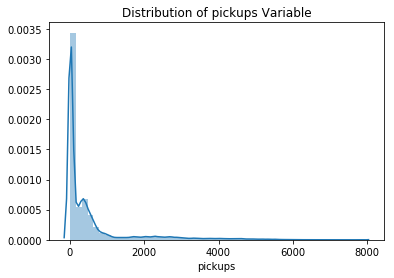

In [16]:
sns.distplot(uber.pickups)
plt.title("Distribution of pickups Variable")
plt.xlabel("pickups")
plt.show()

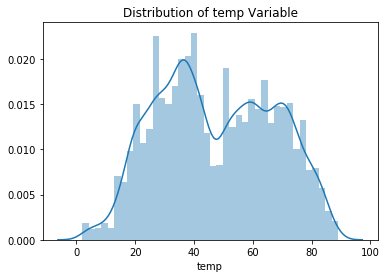

In [17]:
sns.distplot(uber.temp)
plt.title("Distribution of temp Variable")
plt.xlabel("temp")
plt.show()

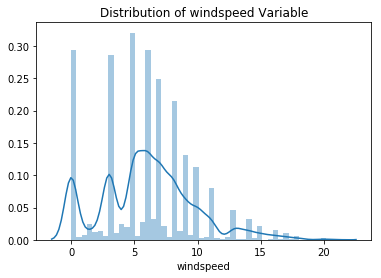

In [18]:
sns.distplot(uber.spd)
plt.title("Distribution of windspeed Variable")
plt.xlabel("windspeed")
plt.show()

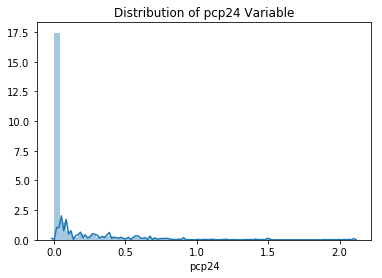

In [19]:
sns.distplot(uber.pcp24)
plt.title("Distribution of pcp24 Variable")
plt.xlabel("pcp24")
plt.show()

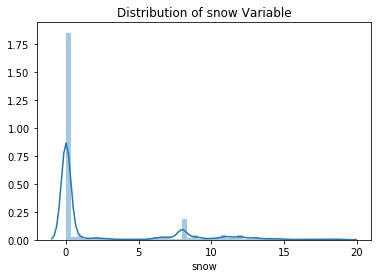

In [20]:
sns.distplot(uber.sd)
plt.title("Distribution of snow Variable")
plt.xlabel("snow")
plt.show()

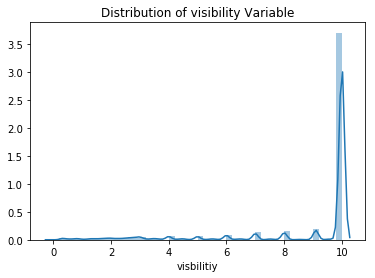

In [21]:
sns.distplot(uber.vsb)
plt.title("Distribution of visibility Variable")
plt.xlabel("visbilitiy")
plt.show()

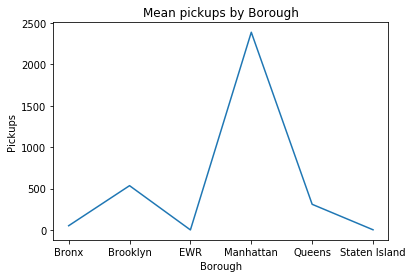

In [22]:
plt.plot(uber.borough[:6,], uber.groupby('borough').pickups.mean())
plt.title("Mean pickups by Borough")
plt.xlabel("Borough")
plt.ylabel("Pickups")
plt.show()

### Unusual Data or Outliers

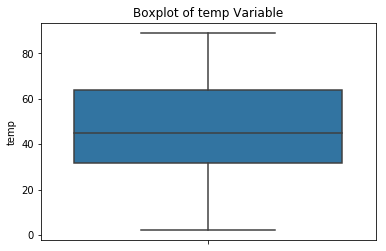

In [23]:
sns.boxplot(uber.temp, orient = 'v')
plt.title("Boxplot of temp Variable")
plt.ylabel("temp")
plt.show()

The temperature variable is pretty evenly distibuted without outliers.

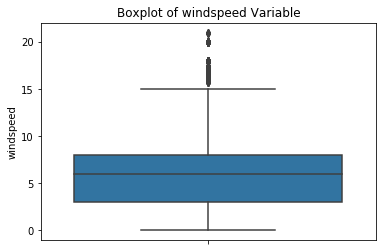

In [24]:
sns.boxplot(uber.spd, orient = 'v')
plt.title("Boxplot of windspeed Variable")
plt.ylabel("windspeed")
plt.show()

There are some outliers for windspeed greater than 15 miles per hour.

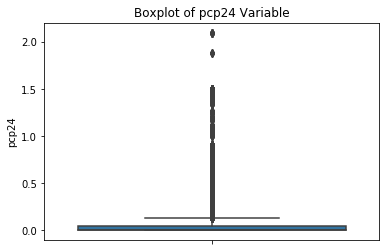

In [25]:
sns.boxplot(uber.pcp24, orient = 'v')
plt.title("Boxplot of pcp24 Variable")
plt.ylabel("pcp24")
plt.show()

All 24-hour liquid precipitation above about 0.2 inches is considered an outlier.

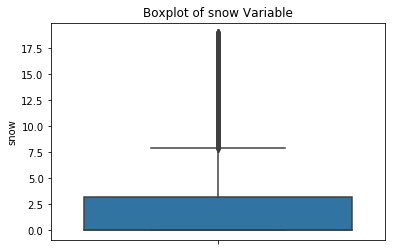

In [26]:
sns.boxplot(uber.sd, orient = 'v')
plt.title("Boxplot of snow Variable")
plt.ylabel("snow")
plt.show()

The snow depths greater than 7.5 inches are outliers.

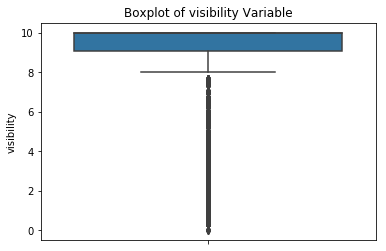

In [27]:
sns.boxplot(uber.vsb, orient = 'v')
plt.title("Boxplot of visibility Variable")
plt.ylabel("visibility")
plt.show()

Visibility less than 8 miles is an outlier.

### Barplots

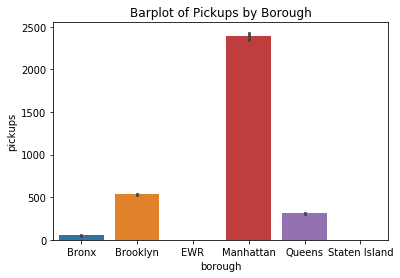

In [28]:
sns.barplot(uber.borough, uber.pickups)
plt.title("Barplot of Pickups by Borough")
plt.show()

The vast majority of pickups are in Manhattan.

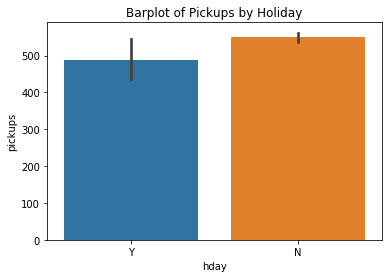

In [29]:
sns.barplot(uber.hday, uber.pickups)
plt.title("Barplot of Pickups by Holiday")
plt.show()

This shows incidation that there are less pickups on Holidays.

### Line Plots by DateTime Groups

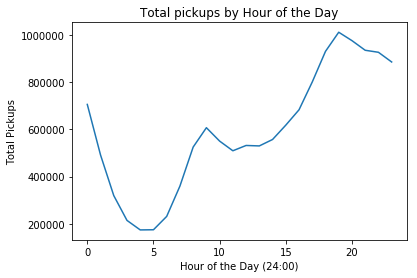

In [30]:
plt.plot(uber.groupby('hour').pickups.sum())
plt.title("Total pickups by Hour of the Day")
plt.xlabel("Hour of the Day (24:00)")
plt.ylabel("Total Pickups")
plt.show()

Logically, significantly less people take Ubers at 3-6 am since most people are sleeping. We believe the spike at around 9 pm is due to commuters and the even larger spike at 8-12 pm is people going out at night than rely on Uber as a designated driver among other reasons.

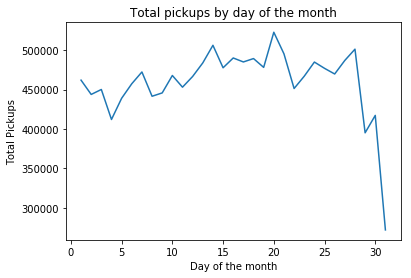

In [31]:
plt.plot(uber.groupby('day').pickups.sum())
plt.title("Total pickups by day of the month")
plt.xlabel("Day of the month")
plt.ylabel("Total Pickups")
plt.show()

The drop off at the end of the month is because half of the months out of the year do not have a 31st day.

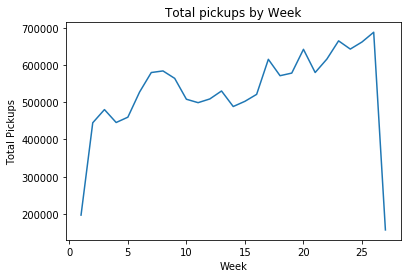

In [32]:
plt.plot(uber.groupby('week').pickups.sum())
plt.title("Total pickups by Week")
plt.xlabel("Week")
plt.ylabel("Total Pickups")
plt.show()

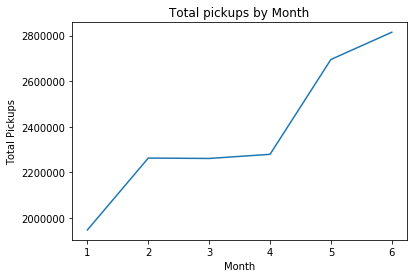

In [33]:
plt.plot(uber.groupby('month').pickups.sum())
plt.title("Total pickups by Month")
plt.xlabel("Month")
plt.ylabel("Total Pickups")
plt.show()

The increase in number of pickups by month does not have a clear reason. We believe this may be because of an increase in Uber's popularity during 2015 due to Goldman Sach's financing of $1.6 billion for Uber.

### Scatter Plots

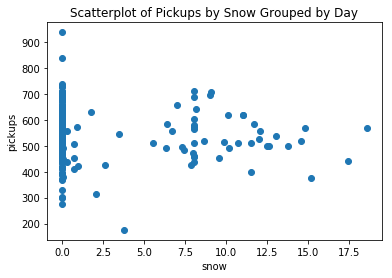

In [34]:
plt.scatter(uberday.sd, uberday.pickups)
plt.title("Scatterplot of Pickups by Snow Grouped by Day")
plt.ylabel("pickups")
plt.xlabel("snow")
plt.show()

There does not seem to be a trend between snowfall and pickups.

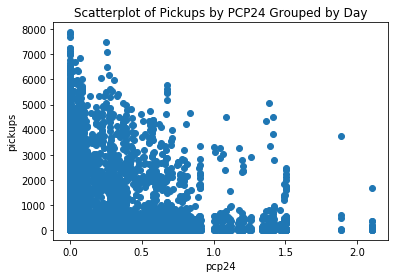

In [35]:
plt.scatter(uber.pcp24, uber.pickups)
plt.title("Scatterplot of Pickups by PCP24 Grouped by Day")
plt.ylabel("pickups")
plt.xlabel("pcp24")
plt.show()

There seems to be less pickups when there is more rain (pcp24 - 24-hour liquid precipitation). It is possible that when it is raining outside, people prefer to stay home and therefore leads to less pickups.

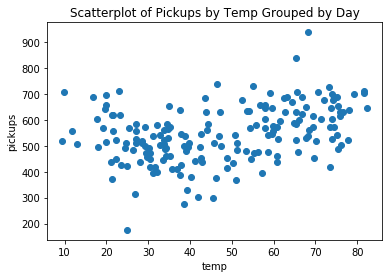

In [36]:
plt.scatter(uberday.temp, uberday.pickups)
plt.title("Scatterplot of Pickups by Temp Grouped by Day")
plt.ylabel("pickups")
plt.xlabel("temp")
plt.show()

There is a slight curve between pickups and temperature with more pickups during the lower and higher temperatures. Our theory was that higher temperatures (better weather) would result in less pickups because people wouldn't mind walking. However, the possible increase in pickups due to popularity occurs during the summer, meaning that if warmer temperatures truly led to less pickups, it would be masked in this scatter plot due to the increase in popularity that happened in the summer.

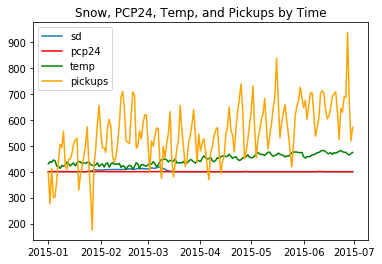

In [37]:
plt.plot(uberday.sd +400)
plt.plot(uberday.pcp24+400, color = 'red')
plt.plot(uberday.temp+400, color = 'green')
plt.plot(uberday.pickups, color = 'orange')
plt.title("Snow, PCP24, Temp, and Pickups by Time")
plt.legend()
plt.show()

# Data Modeling

In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from datetime import time
from sklearn.ensemble import RandomForestRegressor

Based on the exploratory analysis, some of the relationships of interest that showed variance include time and precipitation. 

In [39]:
pd.to_datetime(uber["pickup_dt"].astype(str).str[11:13], format="%H")
uber["date"]= pd.to_datetime(uber["pickup_dt"].astype(str).str[:10], format="%Y-%m-%d")
uber["time"]= uber["pickup_dt"].astype(str).str[11:13]
uber.time= uber.time.astype(int)

In [41]:
x= uber.pcp24
y= uber.pickups

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(x_test).reshape(-1, 1)
reg_pcp24 = linear_model.LinearRegression()
reg_pcp24.fit(x_train,y_train )
y_pred = reg_pcp24.predict(x_train)
reg_pcp24.score(x_train, y_train)

0.00046816207084232625

There does not appeat to be in a linear relationship between the rain in the last 24 hours and the number of pikcups in the area.

Can we predict pickups from time and rain?

In [42]:
x=pd.DataFrame({"time": uber.time, "rain":uber.pcp24})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)
reg3 = linear_model.LinearRegression() 
reg3.fit(x_train, y_train)
y_pred = reg3.predict(x_train)
reg3.score(x_train, y_train)

0.03600261020892259

There also no linear relationship between the both time and rain.

Random forest model using random sampling of predictors from full data set to predict pickups:

First, we need to transform all the variables to numeric so that the random forest algorithm can use them.

In [43]:
import copy
uber_rf = copy.deepcopy(uber)

We will use only numerical predictors for The Random Forest model. 

In [44]:
uber_rf = uber.drop(['pickup_dt','date', 'borough', 'hday'], axis=1)

In [45]:
x = uber_rf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

In [46]:
errors = abs(predictions - y_test)

In [47]:
np.mean(errors)

0.31389268355077876

The average different between the real value and prediction in the test set ~0.31.
To find the accuracy of the predictions, we can make a linear regression from the predictions and the real test values.

In [50]:
reg_rf = linear_model.LinearRegression() 

predictions = predictions.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

reg_rf.fit(predictions, y_test)
reg_rf.score(predictions, y_test)

0.9999825640991098

The random forest model predicts 99% of the test data correctly. This appears to be a very good model.

Text(0,0.5,'Real Value')

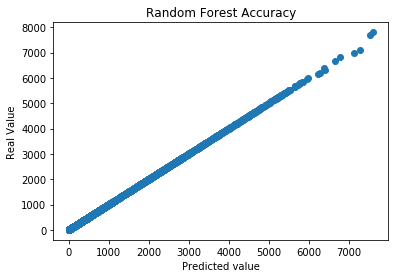

In [52]:
plt.scatter(predictions, y_test)
plt.title("Random Forest Accuracy")
plt.xlabel("Predicted value")
plt.ylabel("Real Value")

As you can from the plot, The Random Forest model has a really high accuracy in predicting the the pickups in NYC.

# Conclusion

After an Exploratory Analysis to discover some possible relationships and by running some linear regressions on the variables of interest, singularly or in a combination, it was evident there were no obvious linear relationships between these variables. This left us to use a more complex model. After moving on to machine learning techniques using the numerical preditors, the Random Forest model was a very good model for predicting the number of pickups in NYC based on the weather variables.
